In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from lime.lime_tabular import LimeTabularExplainer
from sklearn.ensemble import RandomForestClassifier
from sklearn.manifold import TSNE
from sklearn.preprocessing import OneHotEncoder
from lime import lime_tabular
from sklearn.model_selection import train_test_split

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import *
from sklearn.impute import *
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import *
from deap import base, creator, tools, algorithms
from datetime import datetime
from sklearn.svm import SVC
import warnings
import numpy as np
import random

In [2]:
df = pd.read_csv("arrhythmia.csv", header=None).replace("?", np.nan)
data = df.to_numpy()
x, y = data[:, :-1], data[:, -1]
y = pd.Series(y).apply(str)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)
values = df.iloc[:, -1].values

# Calcula as estatísticas
print("Máximo =", np.max(values),
  "Mínimo =", np.min(values),
  "Média =", np.mean(values),
  "Mediana =", np.median(values),
  "Desvio Padrão =", np.std(values))

Máximo = 16 Mínimo = 1 Média = 3.8805309734513274 Mediana = 1.0 Desvio Padrão = 4.402219038329423


In [3]:
x_train

array([[49, 1, 160, ..., -0.5, 7.9, 3.1],
       [17, 0, 170, ..., -1.7, 29.6, 9.6],
       [42, 0, 168, ..., 0.2, 18.1, 19.7],
       ...,
       [25, 1, 162, ..., 0.6, 22.6, 25.2],
       [46, 1, 162, ..., 2.3, 22.9, 37.1],
       [55, 0, 170, ..., 0.6, 15.8, 18.6]], dtype=object)

In [4]:
encoder = OneHotEncoder()
encoder.fit(x_train)
encoded_train = encoder.transform(x_train)
rf = RandomForestClassifier()
rf.fit(encoded_train, y_train)

encoded_train

<361x13569 sparse matrix of type '<class 'numpy.float64'>'
	with 100719 stored elements in Compressed Sparse Row format>

In [18]:
df = pd.read_csv("resultados_LogReg_SEED_13.csv")
df.head(5)

,strategy,k,penalty,c,solver,f1,elapsed_time
0,most_frequent,158,l2,11,lbfgs,0.528444,0.277555
1,median,98,l2,13,saga,0.602906,0.372730
2,mean,158,l2,3,newton-cg,0.524596,0.331067
3,most_frequent,108,l2,6,lbfgs,0.541547,0.274619
4,median,58,l2,13,lbfgs,0.553765,0.202666


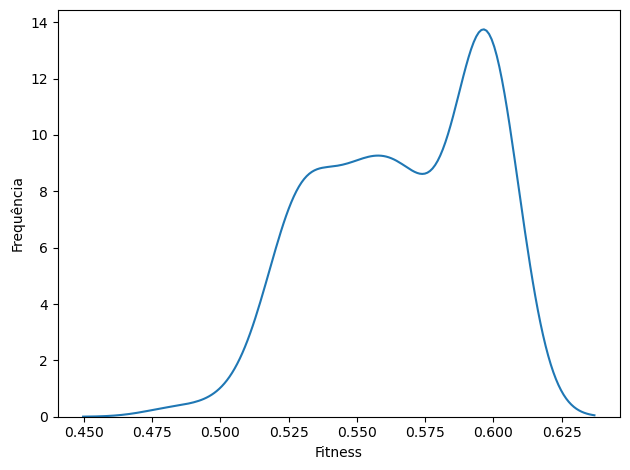

In [19]:
fig, ax = plt.subplots()
sns.kdeplot(df, x="f1", ax=ax)
ax.set_ylabel("Frequência")
ax.set_xlabel("Fitness")
fig.tight_layout()

<Axes: xlabel='elapsed_time', ylabel='Density'>

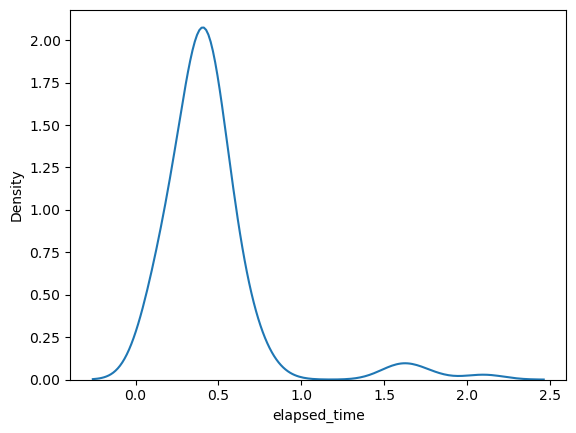

In [20]:
sns.kdeplot(df, x="elapsed_time")

In [21]:
X = df.to_numpy()[:, :-2]
y = df["f1"].astype(float)

df.head(5)

,strategy,k,penalty,c,solver,f1,elapsed_time
0,most_frequent,158,l2,11,lbfgs,0.528444,0.277555
1,median,98,l2,13,saga,0.602906,0.372730
2,mean,158,l2,3,newton-cg,0.524596,0.331067
3,most_frequent,108,l2,6,lbfgs,0.541547,0.274619
4,median,58,l2,13,lbfgs,0.553765,0.202666


In [22]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X)
X_encoded = enc.transform(X).toarray()

X_encoded

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.]])

In [23]:
#t-SNE
x_embedded = TSNE(n_components=2).fit_transform(X_encoded)

x_embedded[:10]

array([[ -2.126033  ,   7.2308235 ],
       [ -4.260679  ,   1.3607055 ],
       [  1.8793731 ,   7.3869214 ],
       [ -0.9867338 ,   6.020381  ],
       [ -1.5064884 ,   3.207898  ],
       [ -0.53233135, -10.855203  ],
       [  2.8739634 ,   3.1074505 ],
       [  3.8981373 ,  -6.49399   ],
       [  5.548474  ,   7.755004  ],
       [  6.6971607 ,   1.1772922 ]], dtype=float32)

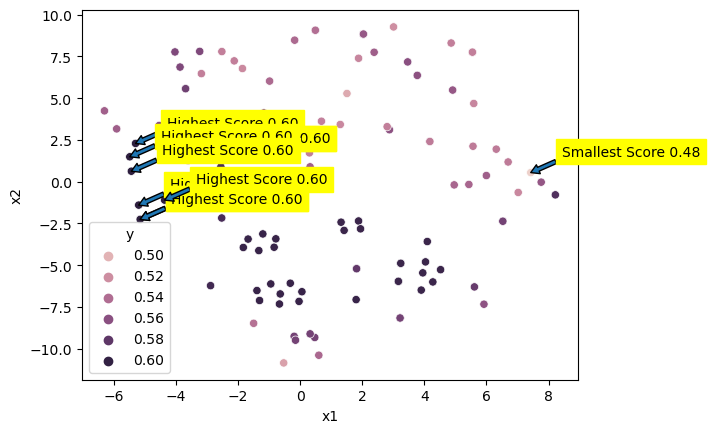

In [24]:
x_embedded_f1 = np.column_stack((x_embedded, df['f1']))
_df = pd.DataFrame(data=x_embedded_f1, columns=["x1", "x2", "y"])
_df.head(5)
ax = sns.scatterplot(data=_df, x="x1", y="x2", hue="y")

# plot highest fitness
coord = _df.loc[_df["y"] == _df["y"].max()]
for i, row in coord.iterrows():
    x, y = row["x1"], row["x2"]
    ax.annotate(f"Highest Score {row['y']:>.2f}", (x, y), (x+1, y+1), arrowprops={"width": 3, "headwidth": 7, "headlength": 6}, backgroundcolor="yellow")

# plot lowest fitness
coord = _df.loc[_df["y"] == _df["y"].min()]
for i, row in coord.iterrows():
    x, y = row["x1"], row["x2"]
    ax.annotate(f"Smallest Score {row['y']:>.2f}", (x, y), (x+1, y+1), arrowprops={"width": 3, "headwidth": 7, "headlength": 6}, backgroundcolor="yellow")

In [25]:
df.loc[df.f1 == df.f1.max()]

,strategy,k,penalty,c,solver,f1,elapsed_time
1,median,98,l2,13,saga,0.602906,0.372730
43,median,98,l2,3,saga,0.602906,0.430059
50,median,98,l2,13,saga,0.602906,0.377731
67,median,98,NaN,14,saga,0.602906,0.391395
72,median,98,l2,11,saga,0.602906,0.376253
81,median,98,NaN,9,saga,0.602906,0.417537
90,median,98,l2,9,saga,0.602906,0.368370
104,median,98,NaN,9,saga,0.602906,0.377861
114,median,98,NaN,13,saga,0.602906,0.386342


In [26]:
# Exibe os resultados
print("Max da coluna 'f1' SEED 13:", df.f1.max())
print("Média da coluna 'f1' 13:", df['f1'].mean())
print("Média da coluna 'elapsed_time' 13:", df['elapsed_time'].mean())

Max da coluna 'f1' SEED 13: 0.6029061784897025
Média da coluna 'f1' 13: 0.5667751046908887
Média da coluna 'elapsed_time' 13: 0.4476528461538462


In [27]:
df = pd.read_csv("resultados_LogReg_SEED_47.csv")

# Exibe os resultados
print("Max da coluna 'f1' SEED 47:", df.f1.max())
print("Média da coluna 'f1': SEED 47", df['f1'].mean())
print("Média da coluna 'elapsed_time' SEED 47:", df['elapsed_time'].mean())

Max da coluna 'f1' SEED 47: 0.5530306650985923
Média da coluna 'f1': SEED 47 0.5162461597654557
Média da coluna 'elapsed_time' SEED 47: 0.4202830086206896


In [28]:
df = pd.read_csv("resultados_LogReg_SEED_89.csv")

# Exibe os resultados
print("Max da coluna 'f1' SEED 89:", df.f1.max())
print("Média da coluna 'f1': SEED 89", df['f1'].mean())
print("Média da coluna 'elapsed_time' SEED 89:", df['elapsed_time'].mean())

Max da coluna 'f1' SEED 89: 0.5823872886725671
Média da coluna 'f1': SEED 89 0.5255868695389193
Média da coluna 'elapsed_time' SEED 89: 0.28931047826086964


In [29]:
df = pd.read_csv("resultados_LogReg_Padrao.csv")

# Exibe os resultados
print("Max da coluna 'f1' Padrao:", df.f1.max())
print("Média da coluna 'f1': Padrao", df['f1'].mean())
print("Média da coluna 'elapsed_time' Padrao:", df['elapsed_time'].mean())

Max da coluna 'f1' Padrao: 0.4470550307392412
Média da coluna 'f1': Padrao 0.44705503073924124
Média da coluna 'elapsed_time' Padrao: 0.10066253278688524


In [30]:
df = pd.read_csv("resultados_LogReg_2.csv")
# Exibe os resultados
print("Max da coluna 'f1':", df.f1.max())
print("Média da coluna 'f1':", df['f1'].mean())
print("Média da coluna 'elapsed_time':", df['elapsed_time'].mean())

Max da coluna 'f1': 0.6199102370179443
Média da coluna 'f1': 0.552661190735835
Média da coluna 'elapsed_time': 0.5722889911504425


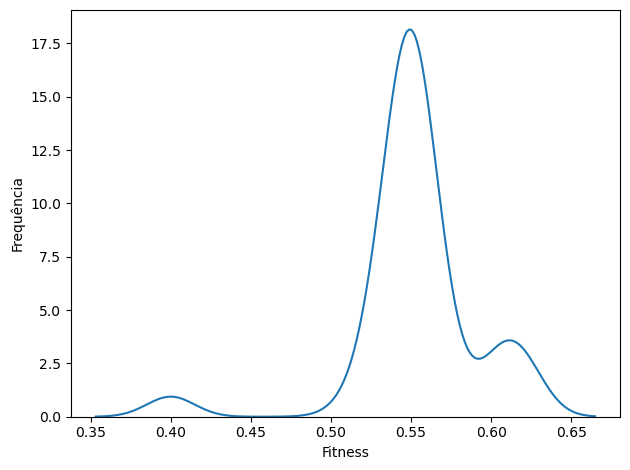

In [53]:
fig, ax = plt.subplots()
sns.kdeplot(df, x="f1", ax=ax)
ax.set_ylabel("Frequência")
ax.set_xlabel("Fitness")
fig.tight_layout()

<Axes: xlabel='elapsed_time', ylabel='Density'>

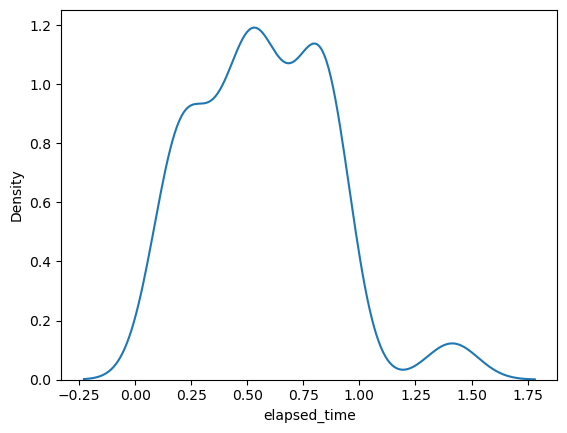

In [54]:
sns.kdeplot(df, x="elapsed_time")

C:\Users\maria\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


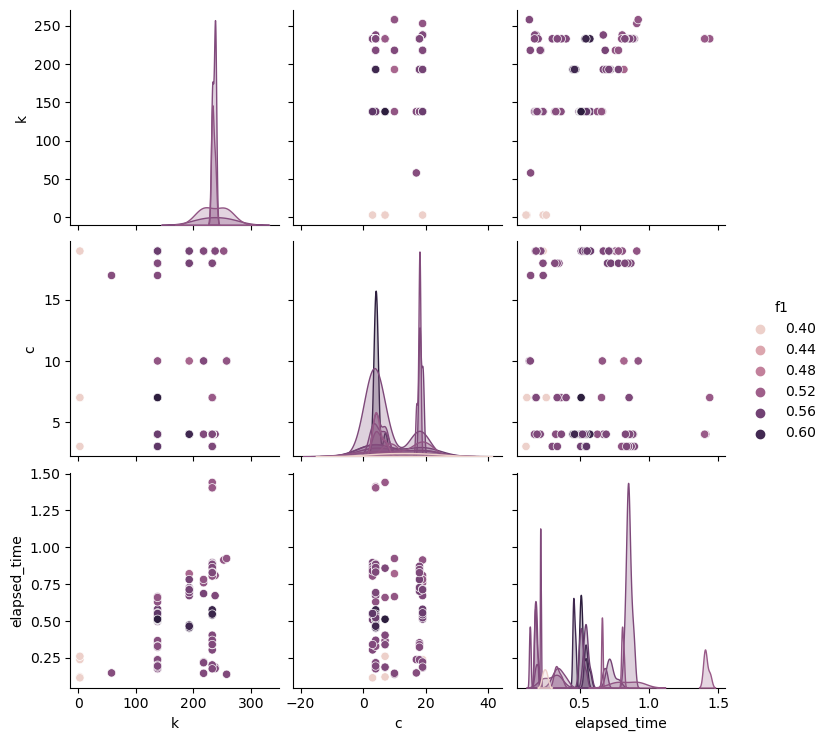

In [55]:
#df.f1.value_counts()

sns.pairplot( df, hue="f1" )

In [56]:
X = df.to_numpy()[:, :-2]
y = df["f1"].astype(float)

df.head(5)

,strategy,k,penalty,c,solver,f1,elapsed_time
0,most_frequent,193,l2,10,newton-cholesky,0.510272,0.820557
1,most_frequent,233,l2,3,saga,0.549822,0.895927
2,mean,238,NaN,19,newton-cg,0.548807,0.181900
3,most_frequent,58,NaN,17,lbfgs,0.542853,0.147226
4,median,3,l2,7,newton-cg,0.400615,0.120083


In [57]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X)
X_encoded = enc.transform(X).toarray()

X_encoded

array([[0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 1., 0., 0.]])

In [58]:
#t-SNE
x_embedded = TSNE(n_components=2).fit_transform(X_encoded)

x_embedded[:10]

array([[  5.1969533 , -10.225553  ],
       [  5.473648  ,   7.08808   ],
       [ -6.792765  ,  -2.6931021 ],
       [  9.842338  ,  -4.6574926 ],
       [ -9.070185  ,   0.32356495],
       [ -3.537166  ,  -2.7909641 ],
       [ -7.4107265 ,  -8.8882675 ],
       [ -3.2811532 ,   4.139369  ],
       [ -7.602722  ,   2.7808552 ],
       [ -8.702881  ,  -6.239444  ]], dtype=float32)

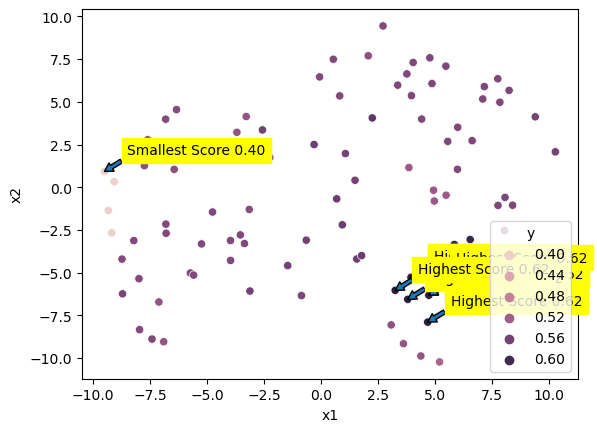

In [59]:
x_embedded_f1 = np.column_stack((x_embedded, df['f1']))
_df = pd.DataFrame(data=x_embedded_f1, columns=["x1", "x2", "y"])
_df.head(5)
ax = sns.scatterplot(data=_df, x="x1", y="x2", hue="y")

# plot highest fitness
coord = _df.loc[_df["y"] == _df["y"].max()]
for i, row in coord.iterrows():
    x, y = row["x1"], row["x2"]
    ax.annotate(f"Highest Score {row['y']:>.2f}", (x, y), (x+1, y+1), arrowprops={"width": 3, "headwidth": 7, "headlength": 6}, backgroundcolor="yellow")

# plot lowest fitness
coord = _df.loc[_df["y"] == _df["y"].min()]
for i, row in coord.iterrows():
    x, y = row["x1"], row["x2"]
    ax.annotate(f"Smallest Score {row['y']:>.2f}", (x, y), (x+1, y+1), arrowprops={"width": 3, "headwidth": 7, "headlength": 6}, backgroundcolor="yellow")

In [60]:
df.loc[df.f1 == df.f1.max()]

,strategy,k,penalty,c,solver,f1,elapsed_time
67,most_frequent,138,NaN,4,newton-cholesky,0.61991,0.505399
79,most_frequent,138,NaN,4,newton-cholesky,0.61991,0.509356
84,most_frequent,138,NaN,4,newton-cholesky,0.61991,0.508712
89,most_frequent,138,NaN,4,newton-cholesky,0.61991,0.510410
93,most_frequent,138,NaN,4,newton-cholesky,0.61991,0.540667
94,most_frequent,138,NaN,4,newton-cholesky,0.61991,0.549887
100,most_frequent,138,NaN,4,newton-cholesky,0.61991,0.509893
112,most_frequent,138,NaN,7,newton-cholesky,0.61991,0.511561


In [61]:
df_X = pd.read_csv("arrhythmia.csv", header=None).replace("?", np.nan)
df_X.shape

(452, 280)

In [62]:
# Exibe os resultados
print("Média da coluna 'f1':", df['f1'].mean())
print("Média da coluna 'elapsed_time':", df['elapsed_time'].mean())

Média da coluna 'f1': 0.552661190735835
Média da coluna 'elapsed_time': 0.5722889911504425


In [ ]:
# Usei esse site como exemplo: https://marcotcr.github.io/lime/tutorials/Tutorial%20-%20continuous%20and%20categorical%20features.html
RANDOM_STATE = 42

df_X = pd.read_csv("arrhythmia.csv", names=list(map(lambda X: f"col_{X}", range(280)))).replace("?", np.nan)
data = df_X.to_numpy()
X, y = data[:, :-1], data[:, -1]
X = X.astype(float)
y = pd.Series(y).astype(float)

preprocess = Pipeline([
        ('imputer', SimpleImputer(strategy="most_frequent"))])

pipeline = pipe = Pipeline([
        ('imputer', SimpleImputer(strategy="most_frequent")),
        ('scaler', StandardScaler()),
        ('feature-selection', SelectKBest(k=103)),
        ('logReg', LogisticRegression(
            penalty=None,
            C=17,
            solver="newton-cholesky",
            random_state=RANDOM_STATE))])

pipeline.fit(X, y)
X = preprocess.fit_transform(X, y)
class_ = pipeline.classes_
y_pred = pipeline.predict(X)

explainer = LimeTabularExplainer(X,
                                 feature_names=df_X.columns[:-1],
                                 class_names=class_)

for i, (y, yp) in enumerate(zip(y, y_pred)):
    if y == yp:
        print(f"classe real: {y}, predição: {yp}")
        exp = explainer.explain_instance(X[i], pipeline.predict_proba)
        exp.show_in_notebook(show_table=True, show_all=False)

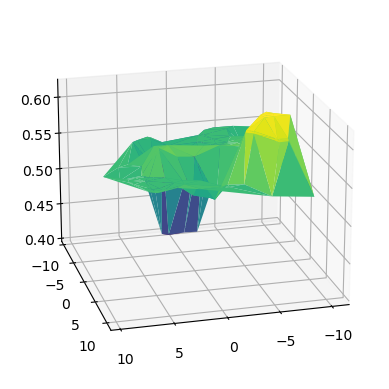

In [63]:
#cria uma imagem 3D
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

X = x_embedded_f1[:, 0]
Y = x_embedded_f1[:, 1]
Z = x_embedded_f1[:, 2]

#Arredondar os valores de X, Y e Z
X = np.round(X, 2)
Y = np.round(Y, 2)
Z = np.round(Z, 2)

ax.plot_trisurf(Y, X, Z, cmap='viridis', linewidth=0.2)
ax.view_init(20, 75)

plt.show()

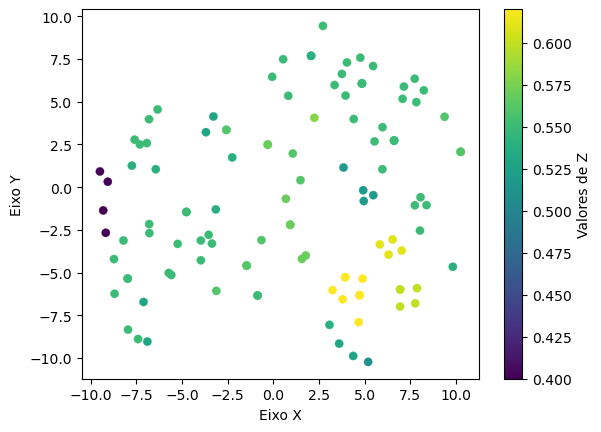

In [64]:
#cria uma imagem 2D que mostre o Z evidente
fig = plt.figure()
ax = fig.add_subplot()

X = x_embedded_f1[:, 0]
Y = x_embedded_f1[:, 1]
Z = x_embedded_f1[:, 2]

#Arredondar os valores de X, Y e Z
X = np.round(X, 2)
Y = np.round(Y, 2)
Z = np.round(Z, 2)

scatter = ax.scatter(X, Y, c=Z, cmap='viridis', linewidth=0.2)

#Definir os rótulos dos eixos
ax.set_xlabel('Eixo X')
ax.set_ylabel('Eixo Y')

# Adicione uma barra de cores
cbar = plt.colorbar(scatter)
cbar.set_label('Valores de Z')

plt.show()